In [110]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [111]:
housing_train = pd.DataFrame(pd.read_csv("gdrive/My Drive/Housing_train.csv"))
housing_train.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [112]:
housing_train1=housing_train[['price','area','bedrooms','bathrooms','stories','parking']]
housing_train1=(housing_train1-housing_train1.mean())/housing_train1.std()
housing_train1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,4.460963,0.945149,1.389581,1.348725,1.305603,1.462707
1,3.898133,1.631915,1.389581,5.224673,2.437805,2.610131
2,3.898133,2.077866,0.027608,1.348725,0.173400,1.462707
3,3.879372,0.980825,1.389581,1.348725,0.173400,2.610131
4,3.447869,0.945149,1.389581,-0.589249,0.173400,1.462707


In [113]:
housing_test = pd.DataFrame(pd.read_csv("gdrive/My Drive/Housing_test.csv"))
housing_test.head()

,price,area,bedrooms,bathrooms,stories,parking
0,2660000,3630,3,3,2,0
1,2660000,2800,3,1,1,0
2,2660000,2430,3,1,1,0
3,2660000,3480,2,1,1,1
4,2660000,4000,3,1,1,0


In [114]:
housing_test1=housing_test[['price','area','bedrooms','bathrooms','stories','parking']]
housing_test1=(housing_test1-housing_test1.mean())/housing_test1.std()
housing_test1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,-0.73877,-0.514037,0.131130,4.151529,0.486927,-0.687979
1,-0.73877,-1.009641,0.131130,-0.481669,-0.807274,-0.687979
2,-0.73877,-1.230573,0.131130,-0.481669,-0.807274,-0.687979
3,-0.73877,-0.603604,-1.193287,-0.481669,-0.807274,0.552841
4,-0.73877,-0.293106,0.131130,-0.481669,-0.807274,-0.687979


In [115]:
#defining test and train data

X_train = housing_train1[['area','bedrooms','bathrooms','stories','parking']].values
y_train = housing_train1['price'].values
X_test = housing_test1[['area','bedrooms','bathrooms','stories','parking']].values
y_test = housing_test1['price'].values

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#let us predict
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))

0.5592013636025674


In [117]:
#Mean Square error of the prediction

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root mean squared error is {rmse}")

Root mean squared error is 0.6606317381588661


In [118]:
#Initiating Gradient Descent calculation for train dataset

housing_train2=housing_train[['price','area','bedrooms','bathrooms','stories','parking']]
housing_train2.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [119]:
housing_train2=(housing_train2-housing_train2.mean())/housing_train2.std()
x = housing_train2[['area','bedrooms','bathrooms','stories','parking']].values
y = housing_train2['price'].values

In [120]:
x = np.c_[np.ones(x.shape[0]), x] 

In [121]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 12000 #No. of iterations
m = y.size #No. of data points
#y.size
np.random.seed(123) #Set the seed
theta = np.random.rand(6) #Pick some random values to start with

In [122]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    prediction_list=[]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        print(theta)
        past_thetas.append(theta)
        
    return prediction_list,past_thetas, past_costs,error

#Pass the relevant variables to the function and get the new values back...
prediction_list,past_thetas, past_costs,error = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
#print("error:",error)

Streaming output truncated to the last 5000 lines.
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.46984077e-01
  2.56416600e-01  1.81240135e-01]
[-2.12548258e-16  3.44939463e-01  3.45706822e-02  3.469840

In [123]:
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent
RMSE_GD=np.sqrt(MSE_GD)
print('Root Mean Square Error from Gradient Descent prediction : {}'.format(round(RMSE_GD,3)))

Root Mean Square Error from Gradient Descent prediction : 0.671


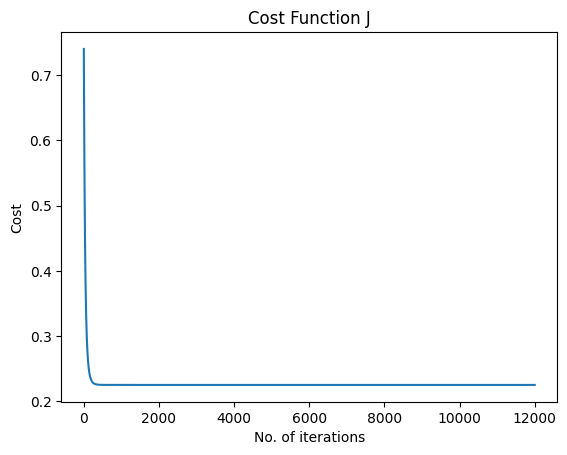

In [124]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()